# Multiple Linear Regression

Multiple linear regression to determine the relationship between independent variables: age, bmi, and smoking status with dependent variable charges. Does age, bmi, and smoking status have an impact on medical insurance charges?

Import necessary packages and read in the csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix as scatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

medical_costs = pd.read_csv('Medical_Cost_Personal_Datasets.csv')

### Prepare the data

In [2]:
#Rename and drop the unnecessary index
medical_costs.rename({'Unnamed: 0':'index'}, axis = 1, inplace = True)
medical_costs.drop(['index'], axis = 1, inplace = True)
medical_costs.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#No null/na values
medical_costs.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
medical_costs.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Explore and Visualize the Data

<AxesSubplot:xlabel='region'>

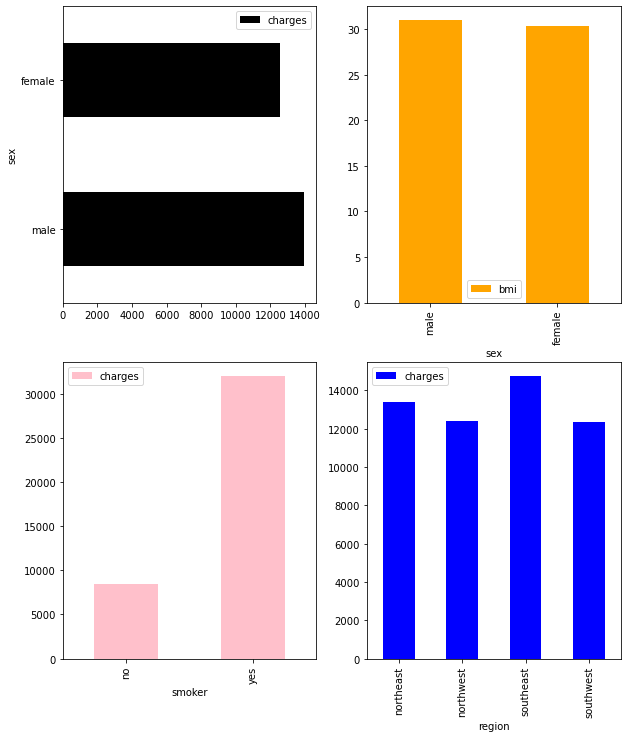

In [5]:
plt.figure(figsize = (10, 12))
plt.subplot(2, 2, 1)
medical_costs.groupby('sex')['charges'].mean().sort_values(ascending = False).plot.barh(color = 'black', legend = True)
plt.subplot(2, 2, 2)
medical_costs.groupby('sex')['bmi'].mean().sort_values(ascending = False).plot.bar(color = 'orange', legend = True)
plt.subplot(2, 2, 3)
medical_costs.groupby('smoker')['charges'].mean().plot.bar(color = 'pink', legend = True)
plt.subplot( 2, 2, 4)
medical_costs.groupby(['region'])['charges'].mean().plot.bar(color = 'blue', legend = True)

In [6]:
'''
Based on the above visualizations here are some assumptions that can be made:

Comparing charges grouped by sex shows males have a bit higher average of medical charges.
Medical charges by sex shows males have roughly a $1,400 higher average.
Average BMI per sex is roughly the same, females slightly lower.
Mean medical charges are substantially lower for those who do not smoke.
Mean medical charges by region are roughly the same.
'''

'\nBased on the above visualizations here are some assumptions that can be made:\n\nComparing charges grouped by sex shows males have a bit higher average of medical charges.\nMedical charges by sex shows males have roughly a $1,400 higher average.\nAverage BMI per sex is roughly the same, females slightly lower.\nMean medical charges are substantially lower for those who do not smoke.\nMean medical charges by region are roughly the same.\n'

In [7]:
medical_costs.groupby('sex')['charges'].mean().round()

sex
female    12570.0
male      13957.0
Name: charges, dtype: float64

In [8]:
#View the correlation between each feature
features = list(['age', 'bmi', 'children', 'charges'])
medical_costs[features].corr().round(2)

,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


### Convert the Categorical Variables to Dummy Variables

In [9]:
categorical_cols = ['sex', 'smoker', 'region']
dummydata = pd.get_dummies(medical_costs, columns = categorical_cols, drop_first = True)
#Drop the first value to eliminate the possibility of correlation among the regressors: multicollinearity. 
dummydata.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Perform Multiple Linear Regression

In [10]:
#Assign the feature variables to X and the label to y.
X = dummydata[['age', 'bmi', 'smoker_yes']]
y = dummydata[['charges']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_) #Intercept of the line of best fit = -11707
print(reg.score(X_test, y_test))

[[  259.41020462   326.45023215 23675.37184666]]
[-11707.80233458]
0.7776932310583375


In [12]:
'''
Based on the above analysis, smoking has the biggest impact on medical insurance charges
increasing, follwed by bmi then age.
'''

'\nBased on the above analysis, smoking has the biggest impact on medical insurance charges\nincreasing, follwed by bmi then age.\n'